In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#%matplotlib inline


['officer-involved-shooting-incidents_officer-involved-shooting-incidents-2017-forward_ois1.csv']


In [2]:
df = pd.read_csv('../input/officer-involved-shooting-incidents_officer-involved-shooting-incidents-2017-forward_ois1.csv')
from datetime import datetime
#datetime.strptime('04-APR-18','%d,%b,%y')
df.sample(7)

,DATE,TIME,HOUR,DAY_OF_WEEK,MONTH,QUARTER,YEAR,INC_RPT,PRECINCT,COUNCIL_DIST,...,SP_INJURY_LEVEL,FATALITY_FLG,SP_GENDER,SP_ETHNICITY,SP_RACE,SP_AGE_AT_INC,SP_AGE_GROUP,PO_RACE,PO_ETHNICITY,REFERENCE_ID
54,14-APR-18,1409,14,06 - Saturday,04 - April,2,2018,2018-654998,400 South Mountain,7,...,Fatal,Fatal,Male,Hispanic,White,44,40's,White,Non-Hispanic,8936.0
41,27-MAR-18,638,6,02 - Tuesday,03 - March,1,2018,2018-532381,400 South Mountain,4,...,Fatal,Fatal,Male,Hispanic,White,44,40's,White,Non-Hispanic,5587.0
91,13-NOV-18,1539,15,02 - Tuesday,11 - November,4,2018,2018-2015739,Unknown,Unknown,...,Fatal,Fatal,Male,Non-Hispanic,Black,24,20's,White,Non-Hispanic,7097.0
15,26-JUL-17,110,1,03 - Wednesday,07 - July,3,2017,2017-1298810,900 Cactus Park,1,...,Fatal,Fatal,Male,Non-Hispanic,White,35,30's,White,Non-Hispanic,8028.0
35,22-FEB-18,1632,16,04 - Thursday,02 - February,1,2018,2018-325796,800 Maryvale / Estrella Mountain,7,...,Fatal,Fatal,Male,Non-Hispanic,White,27,20's,White,Hispanic,9592.0
12,25-JUN-17,1104,11,07 - Sunday,06 - June,2,2017,2017-1103407,200 Black Mountain,2,...,Fatal,Fatal,Male,Non-Hispanic,White,47,40's,White,Non-Hispanic,5984.0
103,09-MAR-19,1918,19,06 - Saturday,03 - March,1,2019,2019-406293,700 Mountain View,8,...,Fatal,Fatal,Male,Non-Hispanic,White,35,30's,White,Non-Hispanic,10278.0


In [3]:
import pandas as pd
import pandas_profiling
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="fifa_pandas_profiling.html")

pandas_profiling.ProfileReport(df)

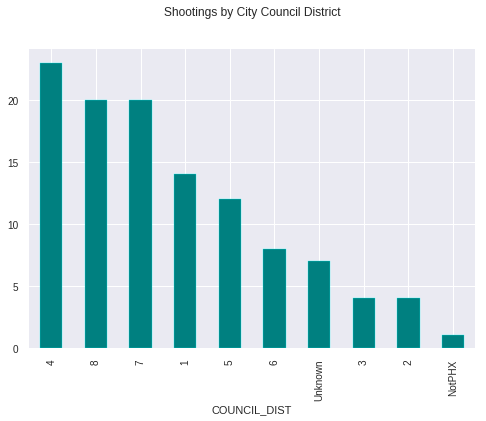

In [4]:
council_dist = df.groupby(['COUNCIL_DIST']).size().sort_values(ascending=False)
council_dist.plot(kind='bar', color='teal', edgecolor='aqua', title='Shootings by City Council District\n\n')
plt.tick_params(top='off', bottom='False', left='off', right='off', labelbottom='on')


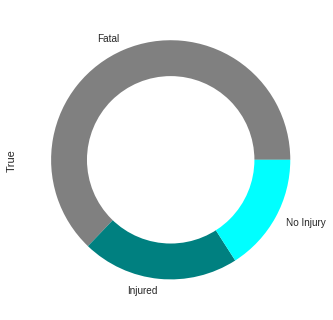

In [5]:
#Result from shooting incident
result = df.groupby(['SP_INJURY_LEVEL']).size()
colors = ['gray','teal', 'cyan', 'turquoise', 'deepskyblue', 'lightseagreen']
result.plot(kind='pie', colors=colors, label=True)
title='jej'
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

113


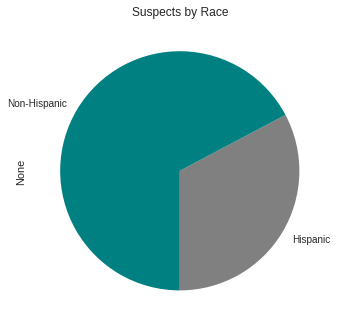

In [6]:
sp_race = df.groupby(['SP_ETHNICITY']).size()
sp_race.plot(kind='pie', startangle=-90, title='Suspects by Race', colors=colors)
officers_numbers = len(df)
print(officers_numbers)
plt.tick_params(top=False, bottom=False, left=False, labelleft=False, right=False, labelbottom=True)


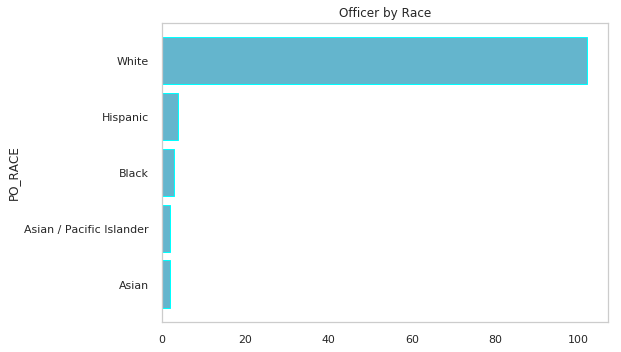

In [7]:
po_race = df.groupby(['PO_RACE']).size()
sns.set(style='whitegrid')
po_race.plot(kind='barh', title='Officer by Race',width=.847, color='c', edgecolor='cyan')
#
plt.tick_params(top=False, bottom=False, left=False, right=False, grid_visible=False)

#sns.countplot(data=df['SP_GENDER'], hue='gender')

,0
PRECINCT,
200 Black Mountain,7
600 Desert Horizon,7
Unknown,8
400 South Mountain,11
500 Central City,11
800 Maryvale / Estrella Mountain,19
900 Cactus Park,20
700 Mountain View,30


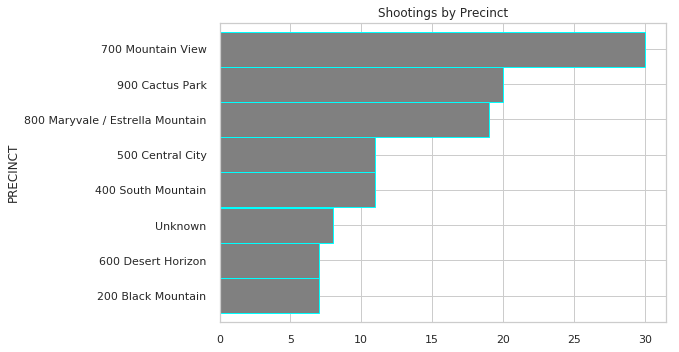

In [8]:
by_precinct = df.groupby(['PRECINCT']).size().sort_values(ascending=True)
by_precinct.plot(kind='barh', 
                 color='gray', 
                 width=.9911,
                 title='Shootings by Precinct', 
                 edgecolor='cyan',
                )
precinct = pd.DataFrame(by_precinct)
precinct

#plt.figure(figsize=())


113


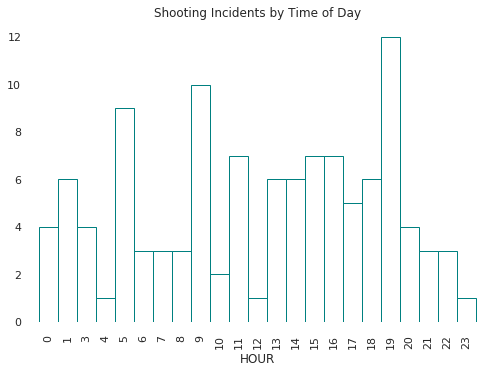

In [9]:
#time of day
tod = df.groupby(['HOUR']).size()
tod.plot(kind='bar', color='white', 
         edgecolor='teal', width=1,
        title='Shooting Incidents by Time of Day', grid=False
        )
for spine in plt.gca().spines.values():
    spine.set_visible(False)
print(len(df.HOUR))

plt.tick_params(top=False, bottom=False, right=False)

#plt.figure(figsize=(6,4))
#sns.countplot(x=df['HOUR'])

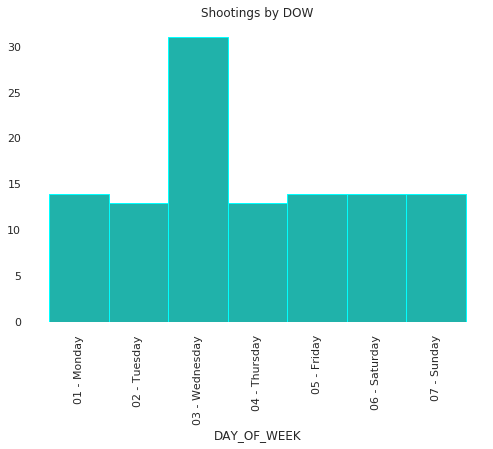

In [10]:
#day of week
dow = df.groupby(['DAY_OF_WEEK']).size()
#dow.plot(kind='barh')
dow.plot(kind='bar', color='lightseagreen', edgecolor='cyan',
         width=1, title='Shootings by DOW' , grid=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    


,DATE,TIME,HOUR,DAY_OF_WEEK,MONTH,QUARTER,YEAR,INC_RPT,PRECINCT,COUNCIL_DIST,...,SP_INJURY_LEVEL,FATALITY_FLG,SP_GENDER,SP_ETHNICITY,SP_RACE,SP_AGE_AT_INC,SP_AGE_GROUP,PO_RACE,PO_ETHNICITY,REFERENCE_ID
0,09-JAN-17,1538,15,01 - Monday,01 - January,1,2017,2017-51067,900 Cactus Park,1,...,Fatal,Fatal,Male,Non-Hispanic,Black,38,30's,White,Non-Hispanic,6256.0
1,09-JAN-17,1538,15,01 - Monday,01 - January,1,2017,2017-51067,900 Cactus Park,1,...,Fatal,Fatal,Male,Non-Hispanic,Black,38,30's,White,Non-Hispanic,9355.0
2,02-MAR-17,1645,16,04 - Thursday,03 - March,1,2017,2017-370161,700 Mountain View,8,...,Fatal,Fatal,Male,Hispanic,White,27,20's,Hispanic,Hispanic,8920.0
3,15-MAR-17,1347,13,03 - Wednesday,03 - March,1,2017,2017-451326,200 Black Mountain,2,...,Fatal,Fatal,Male,Non-Hispanic,White,25,20's,Asian,Non-Hispanic,9422.0
4,15-MAR-17,1347,13,03 - Wednesday,03 - March,1,2017,2017-451326,200 Black Mountain,2,...,Fatal,Fatal,Male,Non-Hispanic,White,25,20's,White,Non-Hispanic,4862.0


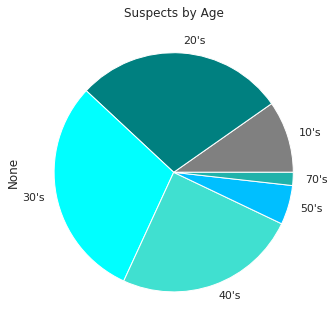

In [11]:
age_group = df.groupby(['SP_AGE_GROUP']).size()
#sns.set(style='whitegrid')
age_group.plot(kind='pie', title='Suspects by Age', colors=colors )
df.head()

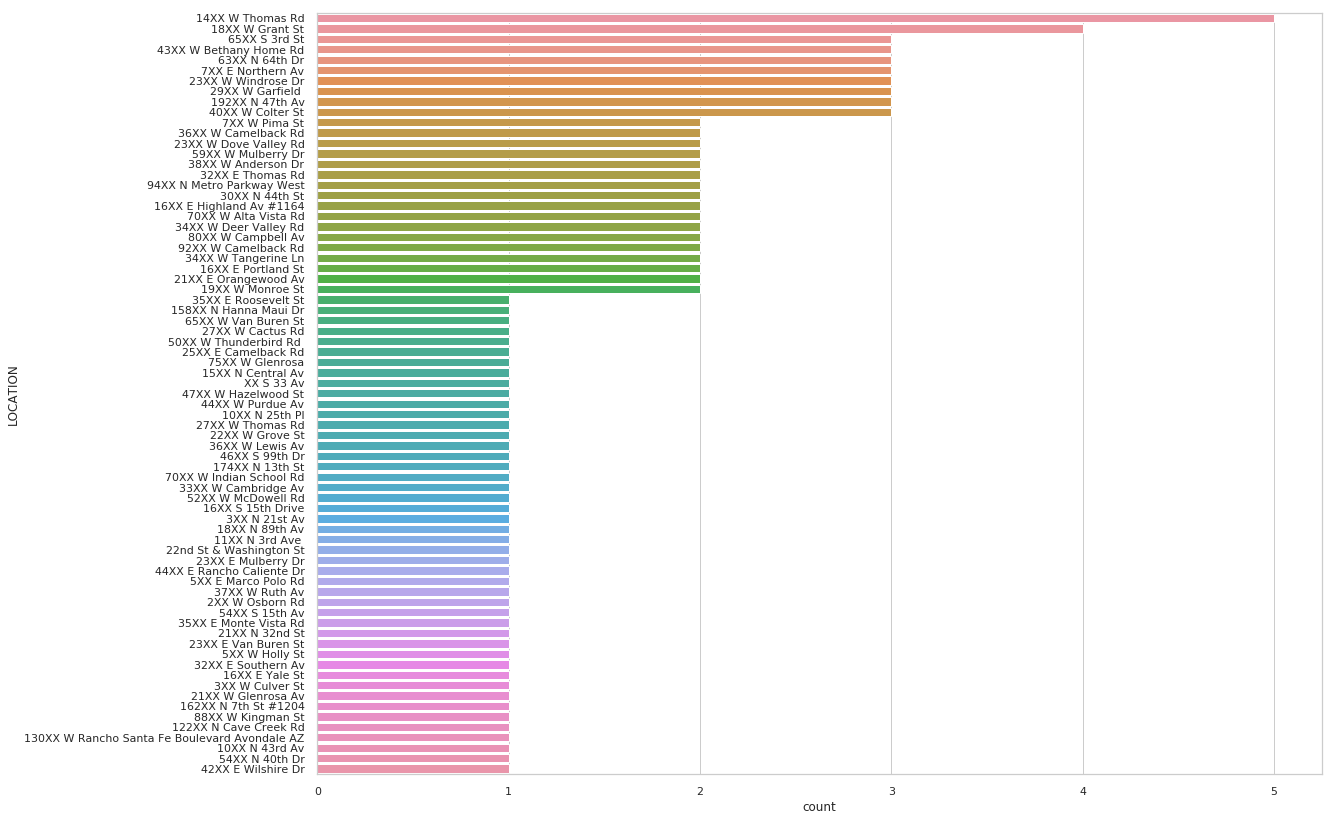

In [12]:
#geo = open('https://opendata.arcgis.com/datasets/efd9cb91283e4aec906a79cf022a6988_0.geojson')
#race and age
plt.figure(figsize=(18,14))
sns.countplot(y=df['LOCATION'],
              order=df['LOCATION'].value_counts().index,
              
         )

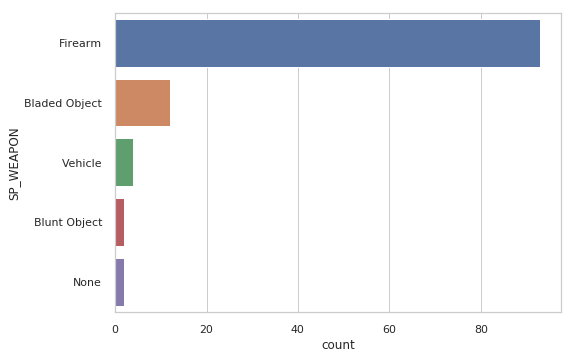

In [13]:
woc = df['SP_WEAPON'].groupby(df['SP_INJURY_LEVEL'])
sns.countplot(y=df['SP_WEAPON'])

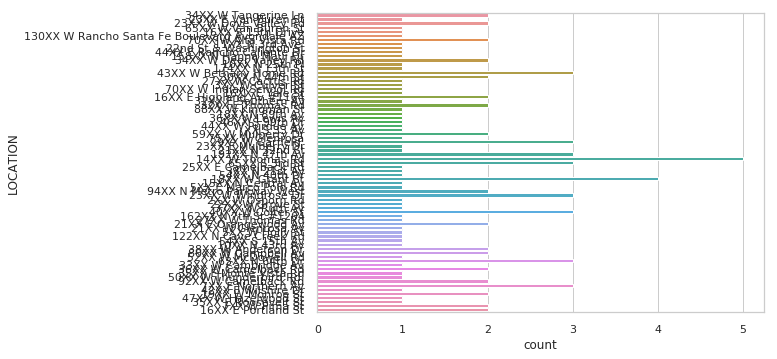

In [14]:
sns.countplot(y=df['LOCATION'])
